In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv('diamonds.csv')

In [25]:
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [26]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [27]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [28]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [30]:
df = df.drop('Unnamed: 0', axis=1)

In [48]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


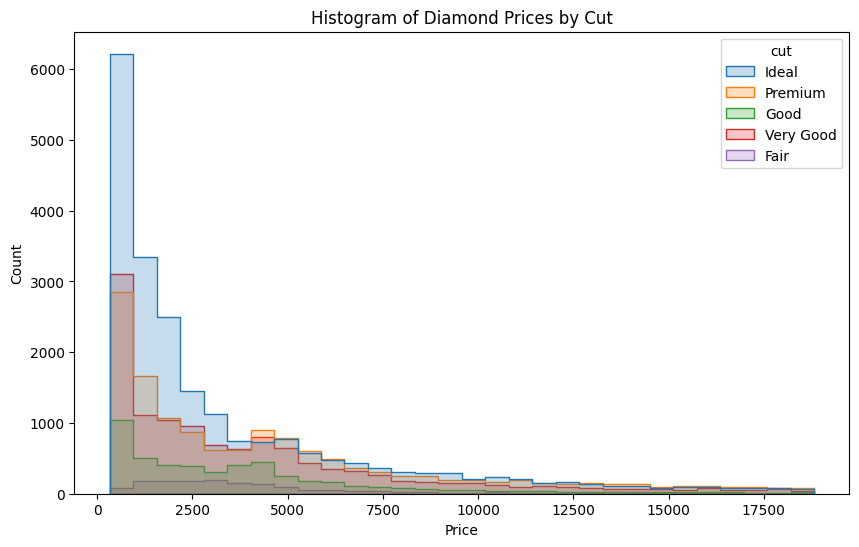

In [54]:
plt.figure(figsize=(10, 6))
sn.histplot(data=df, x='price', hue='cut', bins=30, kde=False, element='step', stat='count')
plt.title('Histogram of Diamond Prices by Cut')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

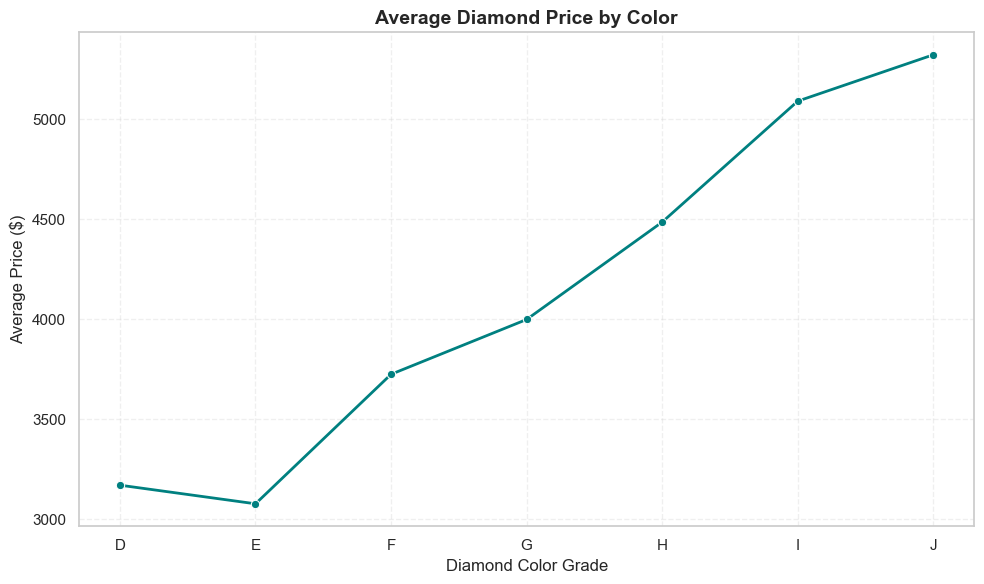

In [43]:
# Calculate average price per color
avg_price_by_color = df.groupby('color')['price'].mean().reindex(['D', 'E', 'F', 'G', 'H', 'I', 'J'])

# Plot
plt.figure(figsize=(10, 6))
sn.lineplot(x=avg_price_by_color.index, y=avg_price_by_color.values, marker='o', color='teal', linewidth=2)

# Styling
plt.title('Average Diamond Price by Color', fontsize=14, fontweight='bold')
plt.xlabel('Diamond Color Grade', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

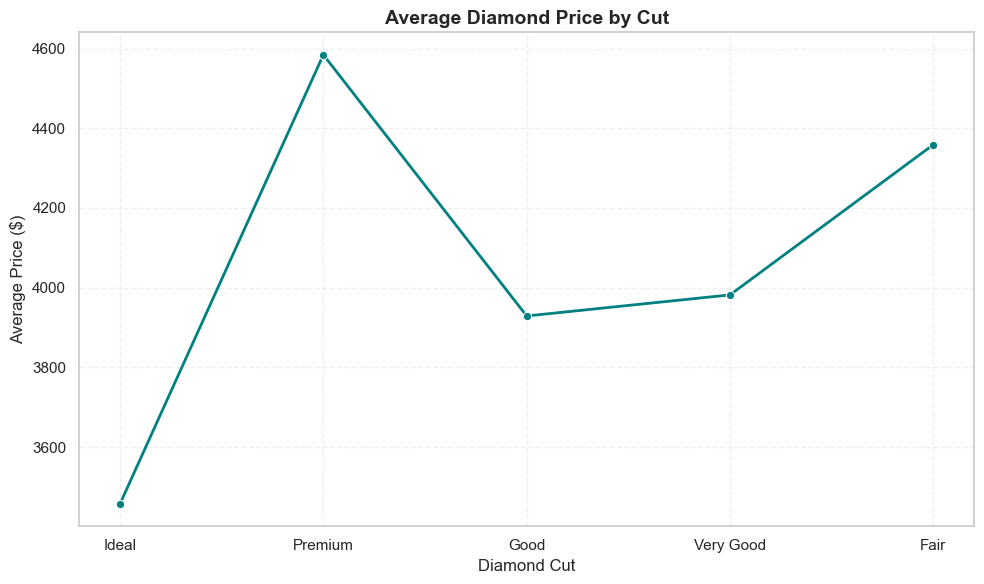

In [45]:
# Calculate average price per color
avg_price_by_color = df.groupby('cut')['price'].mean().reindex(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])

# Plot
plt.figure(figsize=(10, 6))
sn.lineplot(x=avg_price_by_color.index, y=avg_price_by_color.values, marker='o', color='teal', linewidth=2)

# Styling
plt.title('Average Diamond Price by Cut', fontsize=14, fontweight='bold')
plt.xlabel('Diamond Cut', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

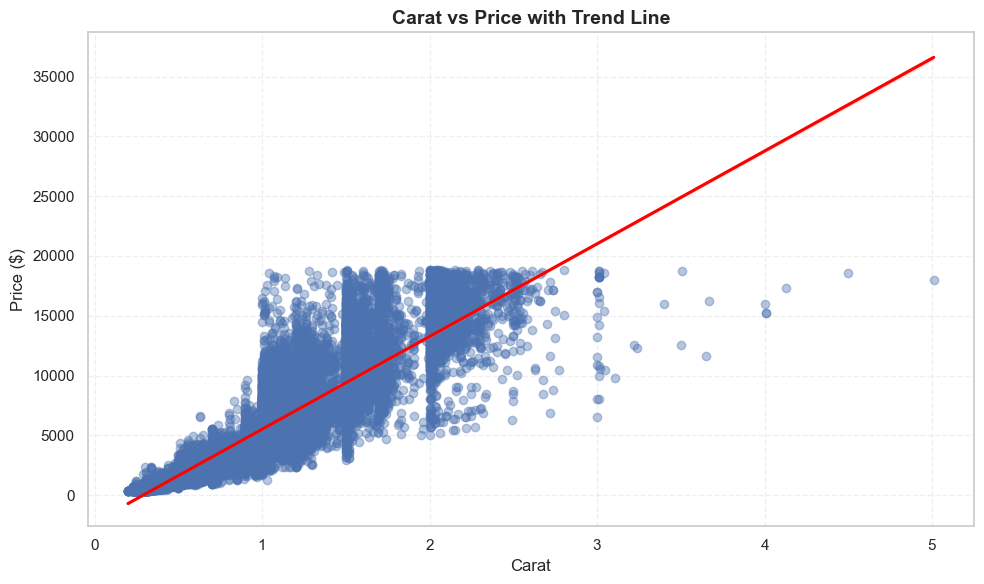

In [68]:
plt.figure(figsize=(10, 6))
sn.regplot(data=df, x='carat', y='price', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})

plt.title('Carat vs Price with Trend Line', fontsize=14, fontweight='bold')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
df[df['color'] == 'J'].groupby('cut')['price'].mean()

cut
Fair         4975.655462
Good         4574.172638
Ideal        4918.186384
Premium      6294.591584
Very Good    5103.513274
Name: price, dtype: float64

In [46]:
df.groupby('cut')['carat'].mean()

cut
Fair         1.046137
Good         0.849185
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Name: carat, dtype: float64

In [41]:
df[df['color'] == 'E'].groupby('cut')['price'].mean()

cut
Fair         3682.312500
Good         3423.644159
Ideal        2597.550090
Premium      3538.914420
Very Good    3214.652083
Name: price, dtype: float64

In [40]:
df[df['color'] == 'D'].groupby('cut')['price'].mean()

cut
Fair         4291.061350
Good         3405.382175
Ideal        2629.094566
Premium      3631.292576
Very Good    3470.467284
Name: price, dtype: float64

In [42]:
df.groupby('color')['carat'].mean().reindex(['D', 'E', 'F', 'G', 'H', 'I', 'J'])

color
D    0.657795
E    0.657867
F    0.736538
G    0.771190
H    0.911799
I    1.026927
J    1.162137
Name: carat, dtype: float64

In [47]:
#Majority of Price Range
price_bins = pd.cut(df['price'], bins=10)
print(df['price'].value_counts(bins=10).sort_index())

(307.502, 2175.7]     25335
(2175.7, 4025.4]       9328
(4025.4, 5875.1]       7393
(5875.1, 7724.8]       3878
(7724.8, 9574.5]       2364
(9574.5, 11424.2]      1745
(11424.2, 13273.9]     1306
(13273.9, 15123.6]     1002
(15123.6, 16973.3]      863
(16973.3, 18823.0]      726
Name: count, dtype: int64


In [49]:
print("Actual min price:", df['price'].min())
print("Actual max price:", df['price'].max())

Actual min price: 326
Actual max price: 18823


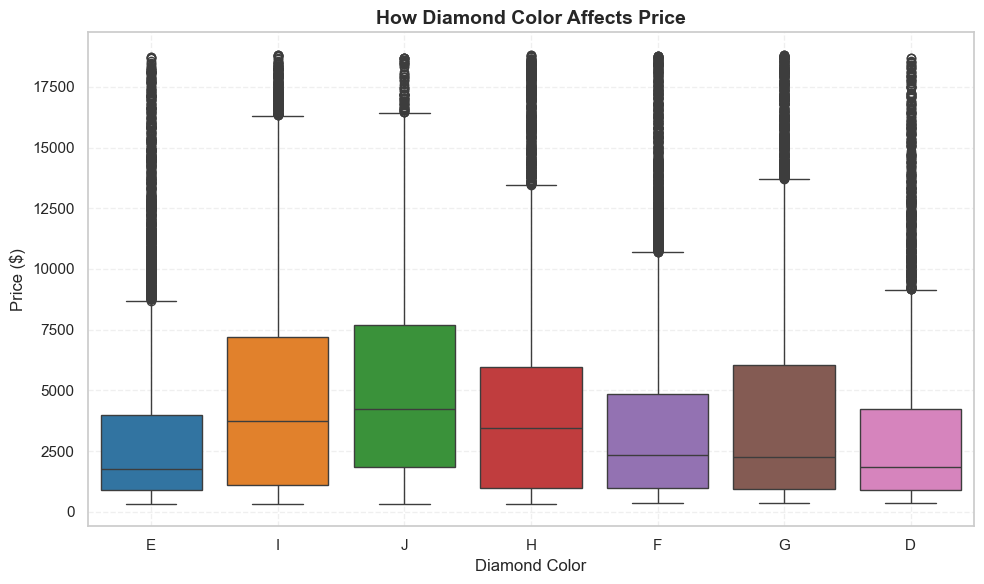

In [38]:

plt.figure(figsize=(10, 6))
sn.boxplot(data=df, x='color', y='price', palette='tab10')

plt.title('How Diamond Color Affects Price', fontsize=14, fontweight='bold')
plt.xlabel('Diamond Color', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

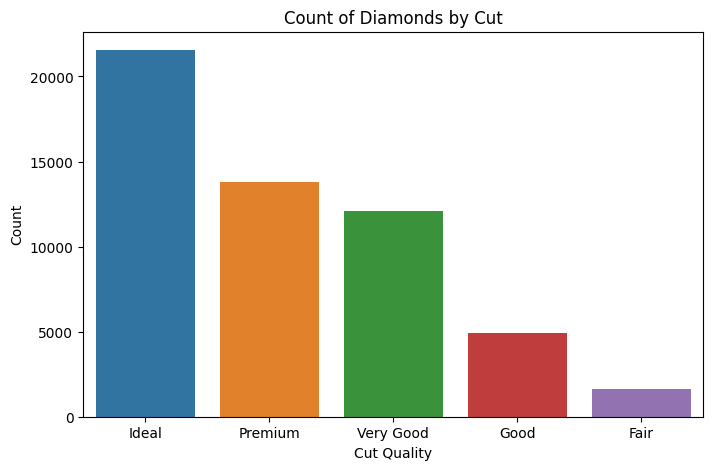

In [14]:
plt.figure(figsize=(8, 5))
sn.countplot(data=df, x='cut', order=df['cut'].value_counts().index, palette='tab10')
plt.title('Count of Diamonds by Cut')
plt.xlabel('Cut Quality')
plt.ylabel('Count')
plt.show()

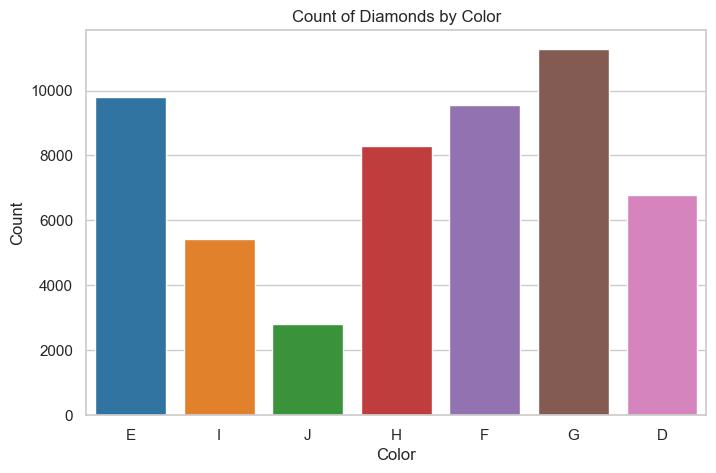

In [32]:
plt.figure(figsize=(8, 5))
sn.countplot(data=df, x='color', palette='tab10')
plt.title('Count of Diamonds by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

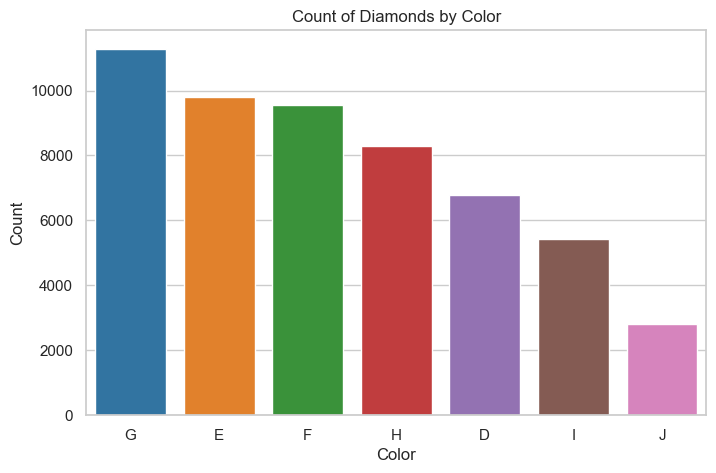

In [22]:
plt.figure(figsize=(8, 5))
sn.countplot(data=df, x='color', order=df['color'].value_counts().index, palette='tab10')
plt.title('Count of Diamonds by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

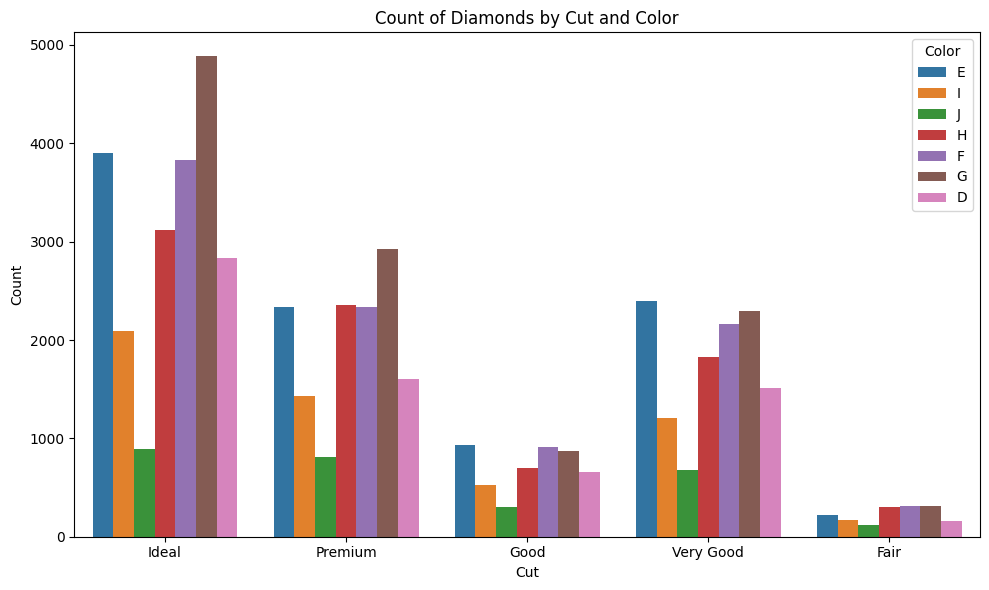

In [67]:
plt.figure(figsize=(10, 6))
sn.countplot(data=df, x='cut', hue='color', palette='tab10')
plt.title('Count of Diamonds by Cut and Color')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Color')
plt.tight_layout()
plt.show()

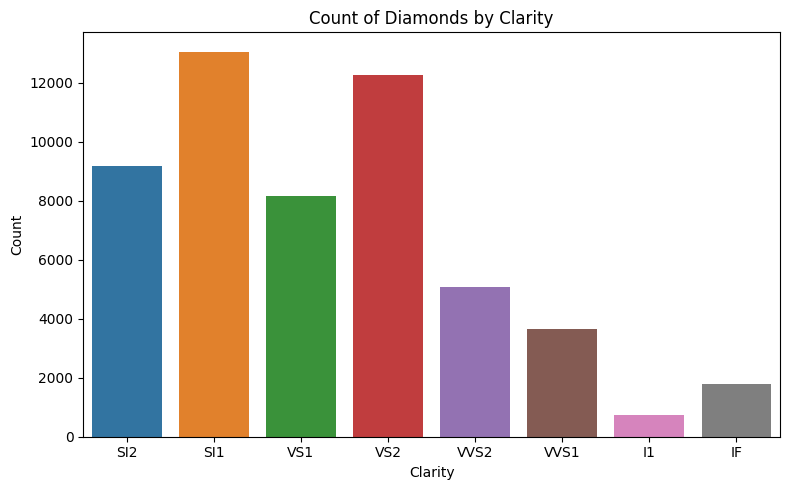

In [68]:
plt.figure(figsize=(8, 5))
sn.countplot(data=df, x='clarity', palette='tab10')
plt.title('Count of Diamonds by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

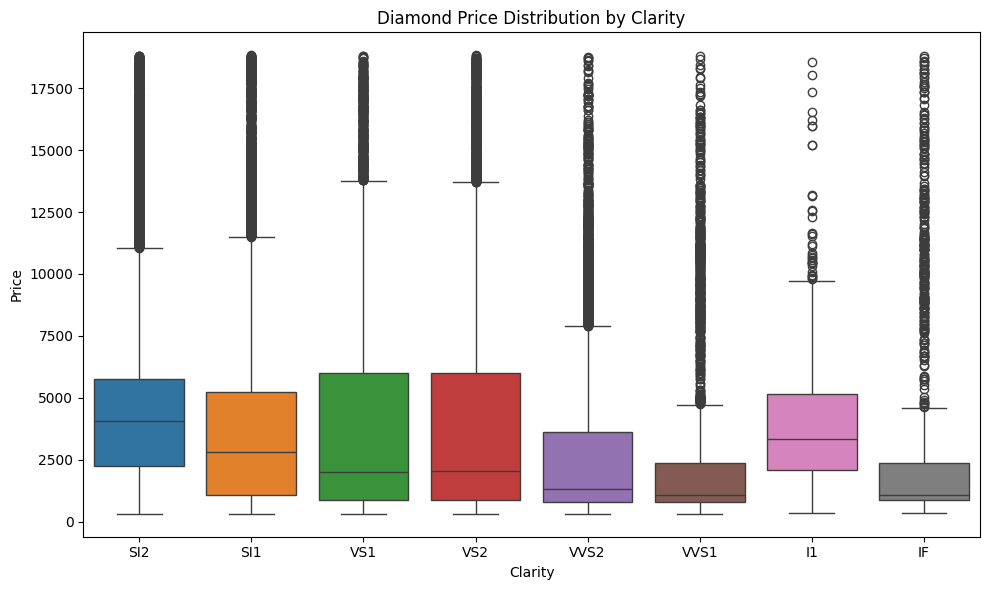

In [72]:
plt.figure(figsize=(10, 6))
sn.boxplot(data=df, x='clarity', y='price', palette='tab10')
plt.title('Diamond Price Distribution by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

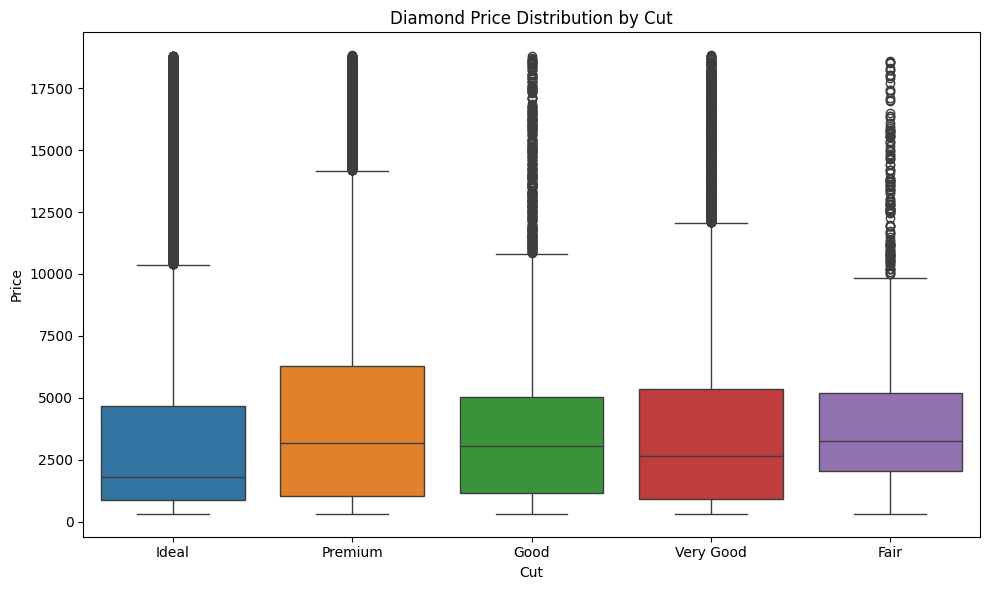

In [74]:

plt.figure(figsize=(10, 6))
sn.boxplot(data=df, x='cut', y='price', palette='tab10')
plt.title('Diamond Price Distribution by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

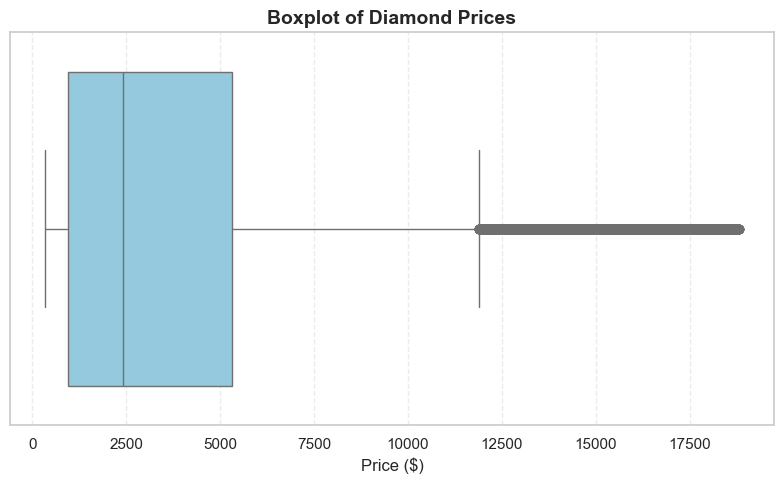

In [59]:

plt.figure(figsize=(8, 5))
sn.boxplot(x=df['price'], color='skyblue')

plt.title('Boxplot of Diamond Prices', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

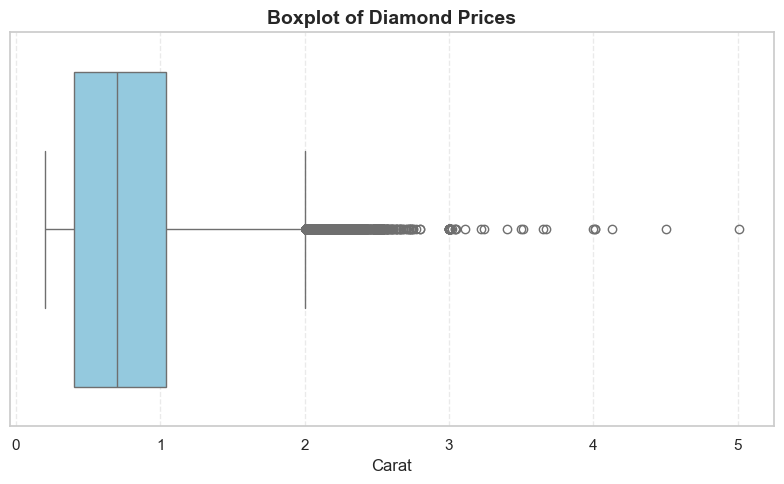

In [58]:

plt.figure(figsize=(8, 5))
sn.boxplot(x=df['carat'], color='skyblue')
plt.title('Boxplot of Diamond Prices', fontsize=14, fontweight='bold')
plt.xlabel('Carat', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

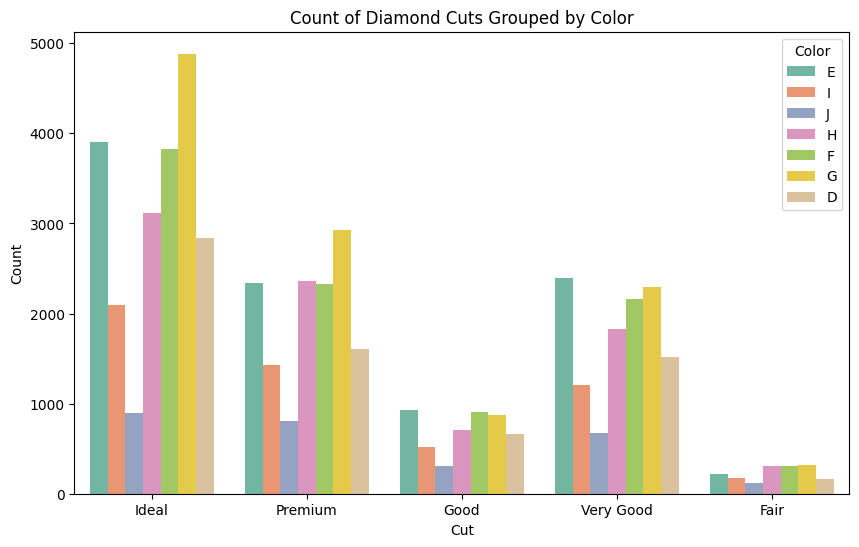

In [56]:
plt.figure(figsize=(10, 6))
sn.countplot(data=df, x='cut', hue='color', palette='Set2')
plt.title('Count of Diamond Cuts Grouped by Color')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Color')
plt.show()

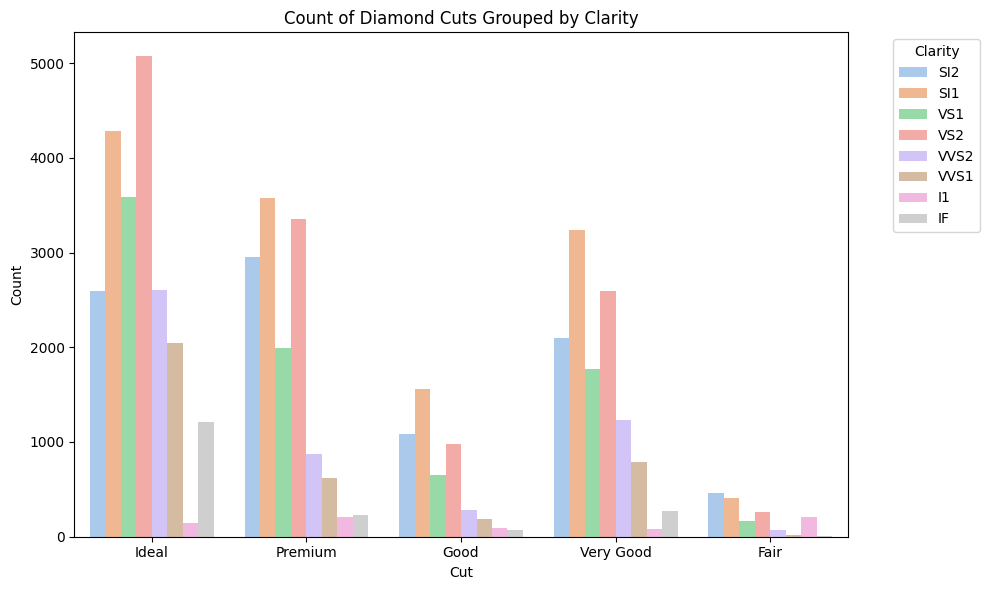

In [60]:

plt.figure(figsize=(10, 6))
sn.countplot(data=df, x='cut', hue='clarity', palette='pastel')
plt.title('Count of Diamond Cuts Grouped by Clarity')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
#cut is typically the cut quality of diamonds — and it has an inherent order, making it ordinal categorical data. There is a quality ranking from worst to best
#Fair < Good < Very Good < Premium < Ideal, hence, mapped numerically in this order

cut_map = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

df['cut'] = df['cut'].map(cut_map)

In [10]:
#color feature in diamond datasets represents diamond color grading, where:
# D is best (colorless); E, F, G are near-colorless; H, I, J are progressively more tinted

color_map = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6
}

df['color'] = df['color'].map(color_map)

In [11]:
# clarity column in diamond datasets represents how free a diamond is from internal inclusions and external blemishes.
#I1: Included, SI2, SI1: Slightly Included; VS2, VS1: Very Slightly Included; VVS2, VVS1: Very Very Slightly Included; IF: Internally Flawless (best)

clarity_map = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

df['clarity'] = df['clarity'].map(clarity_map)

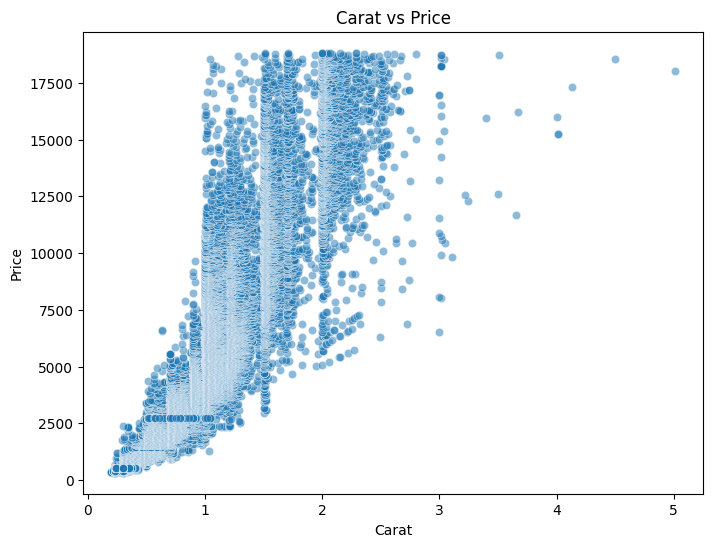

In [33]:
plt.figure(figsize=(8, 6))
sn.scatterplot(data=df, x='carat', y='price', alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='cut', ylabel='price'>

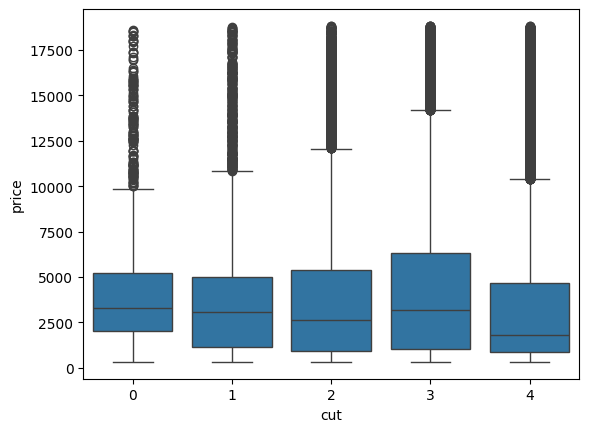

In [34]:
sn.boxplot(data=df, x='cut', y='price')

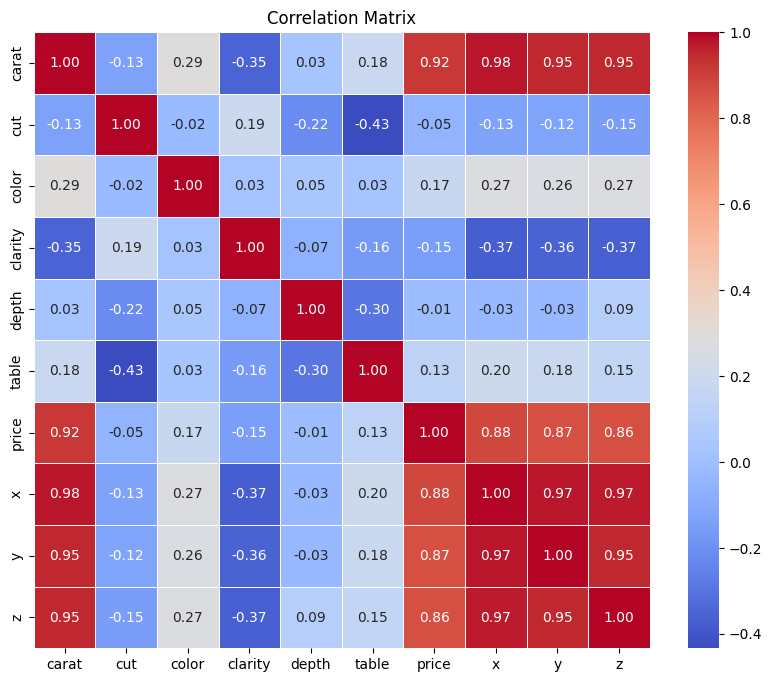

In [87]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

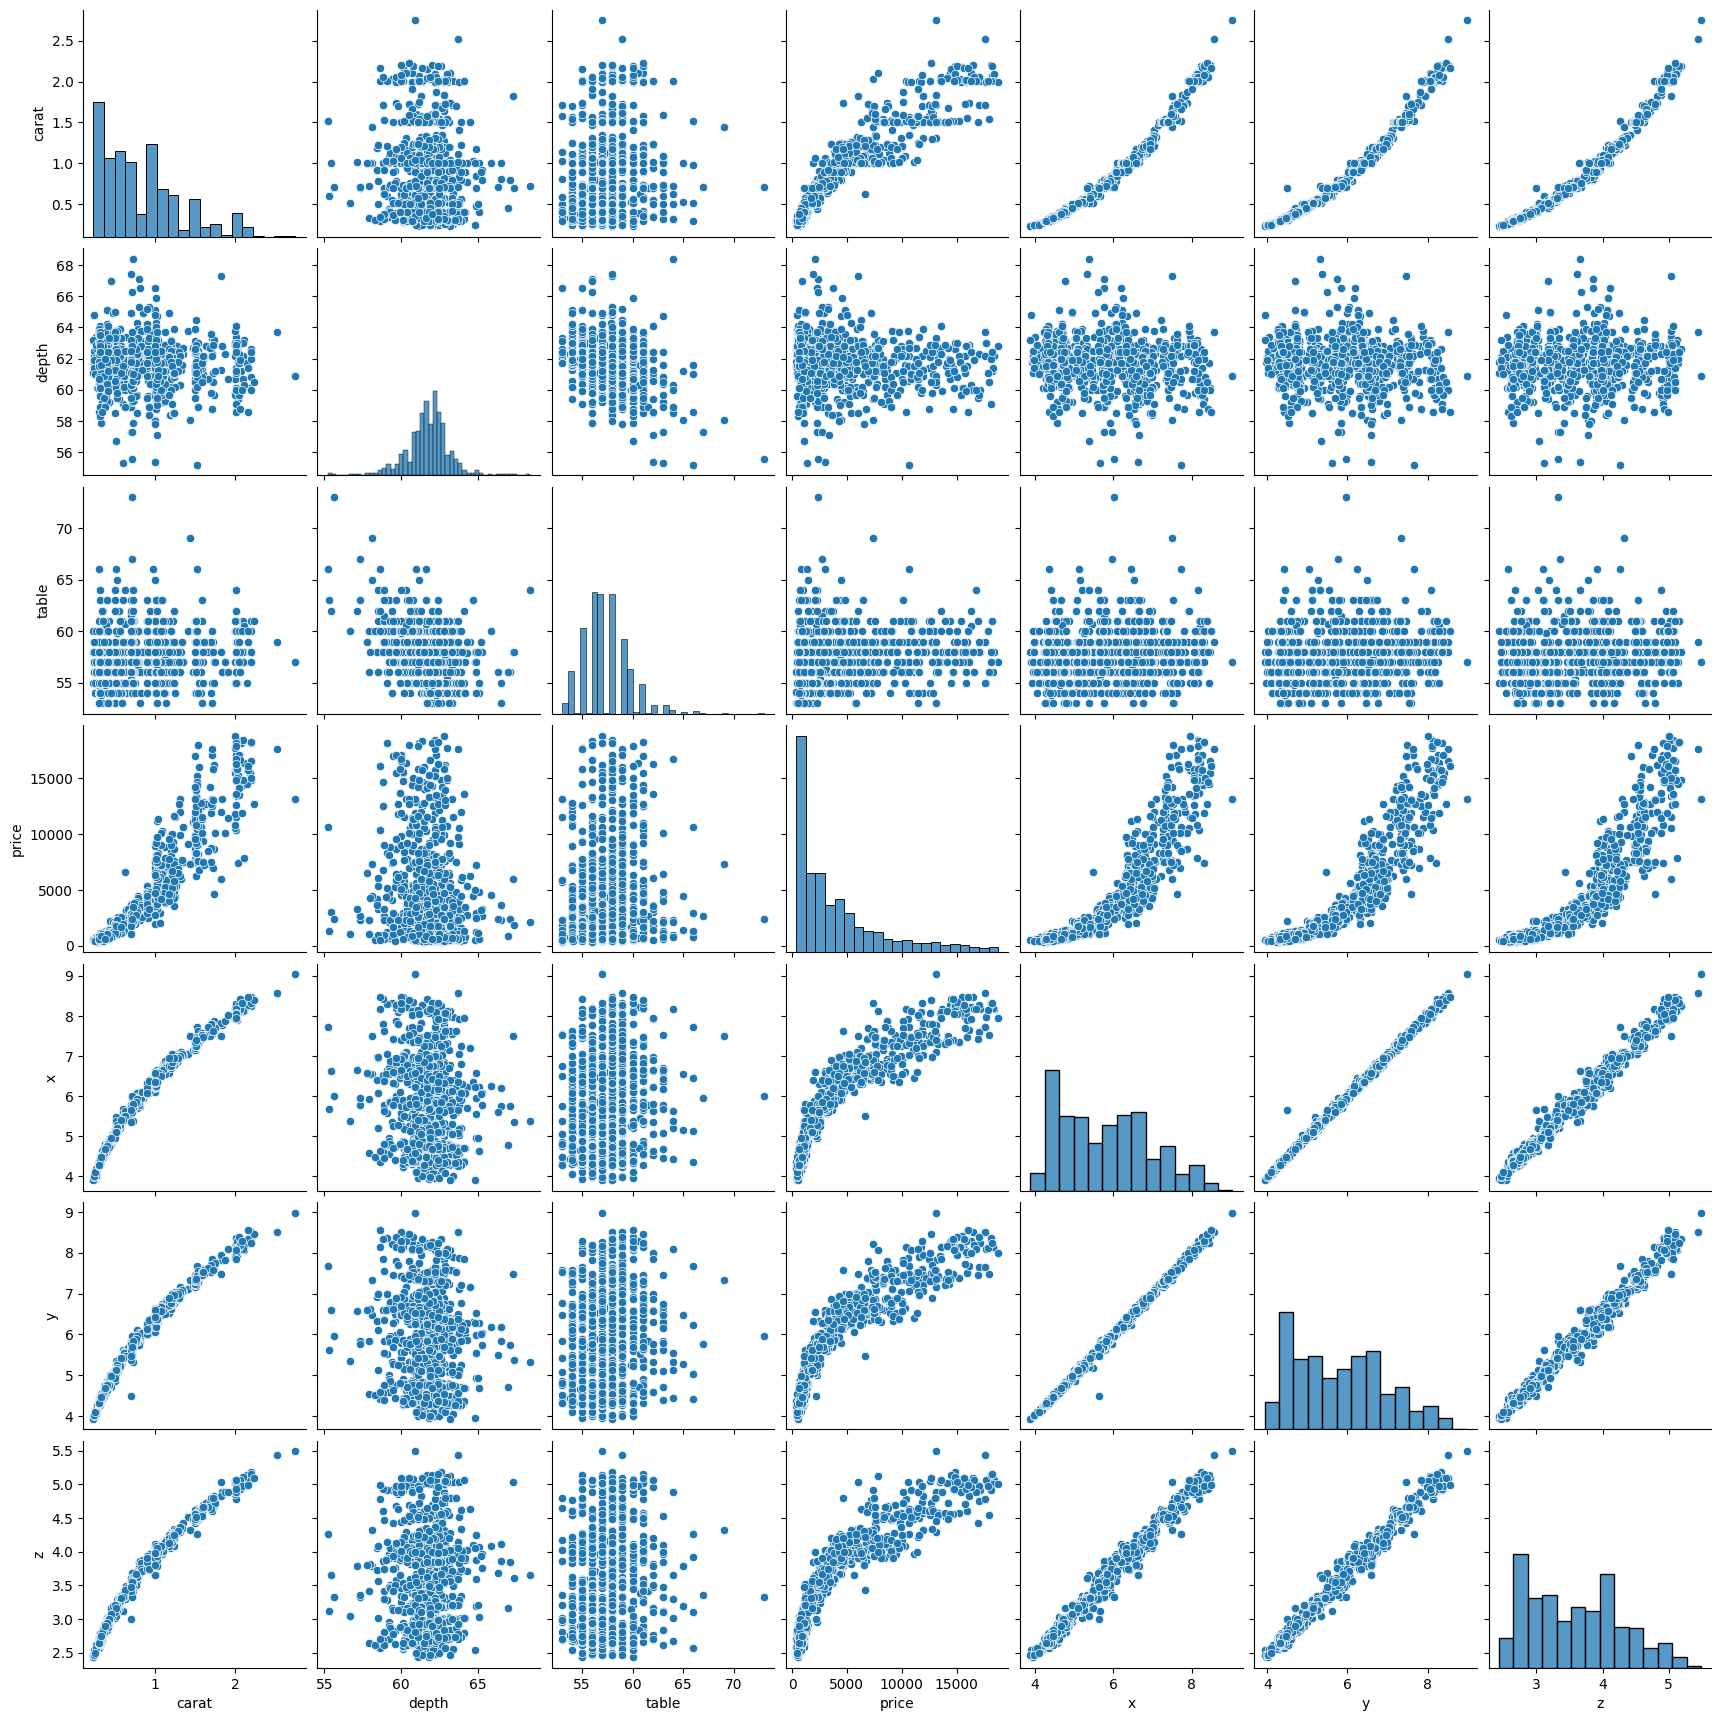

In [39]:
# Select relevant features
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Optional: sample if dataset is large
df_sample = df[features].sample(1000, random_state=42)

# Create the pairplot
sn.pairplot(df_sample)
plt.show()

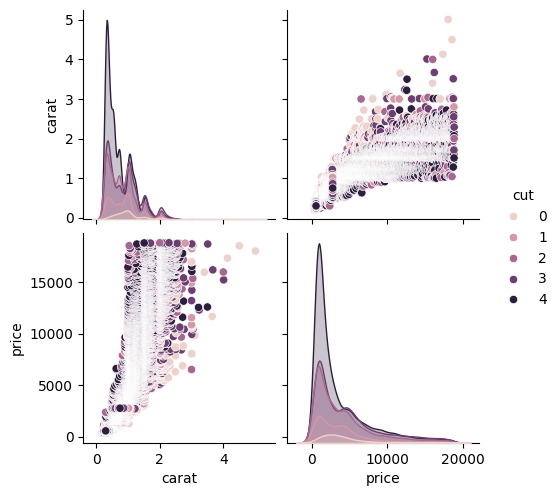

In [40]:
sn.pairplot(df, vars=['carat', 'price'], hue='cut')
plt.show()

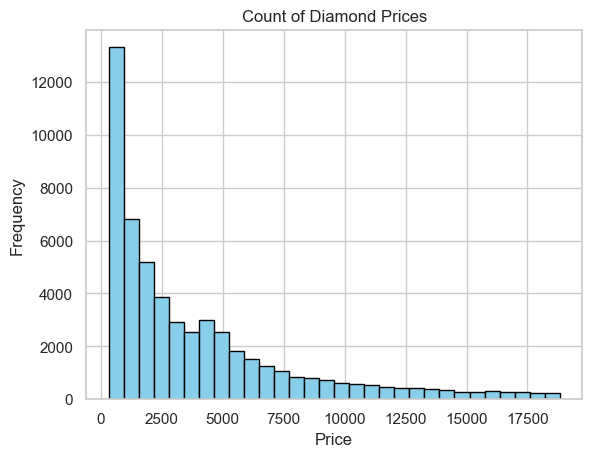

In [19]:
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Count of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

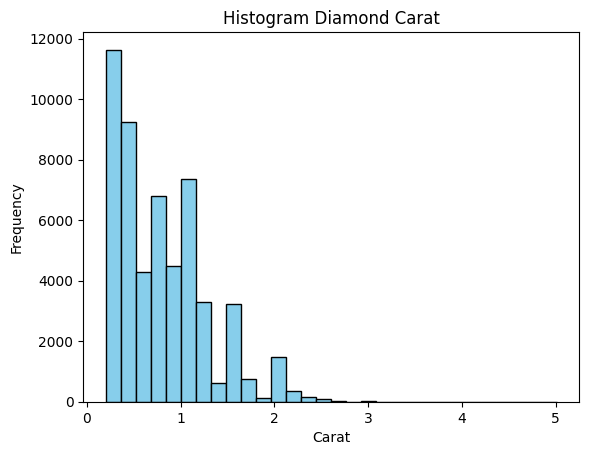

In [12]:
plt.hist(df['carat'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram Diamond Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

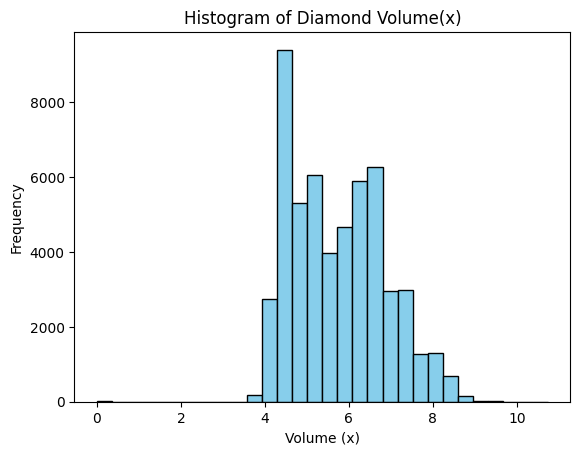

In [92]:
plt.hist(df['x'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Diamond Volume(x)')
plt.xlabel('Volume (x)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Features
X = df.drop('price', axis=1)

# Target
y = df['price']

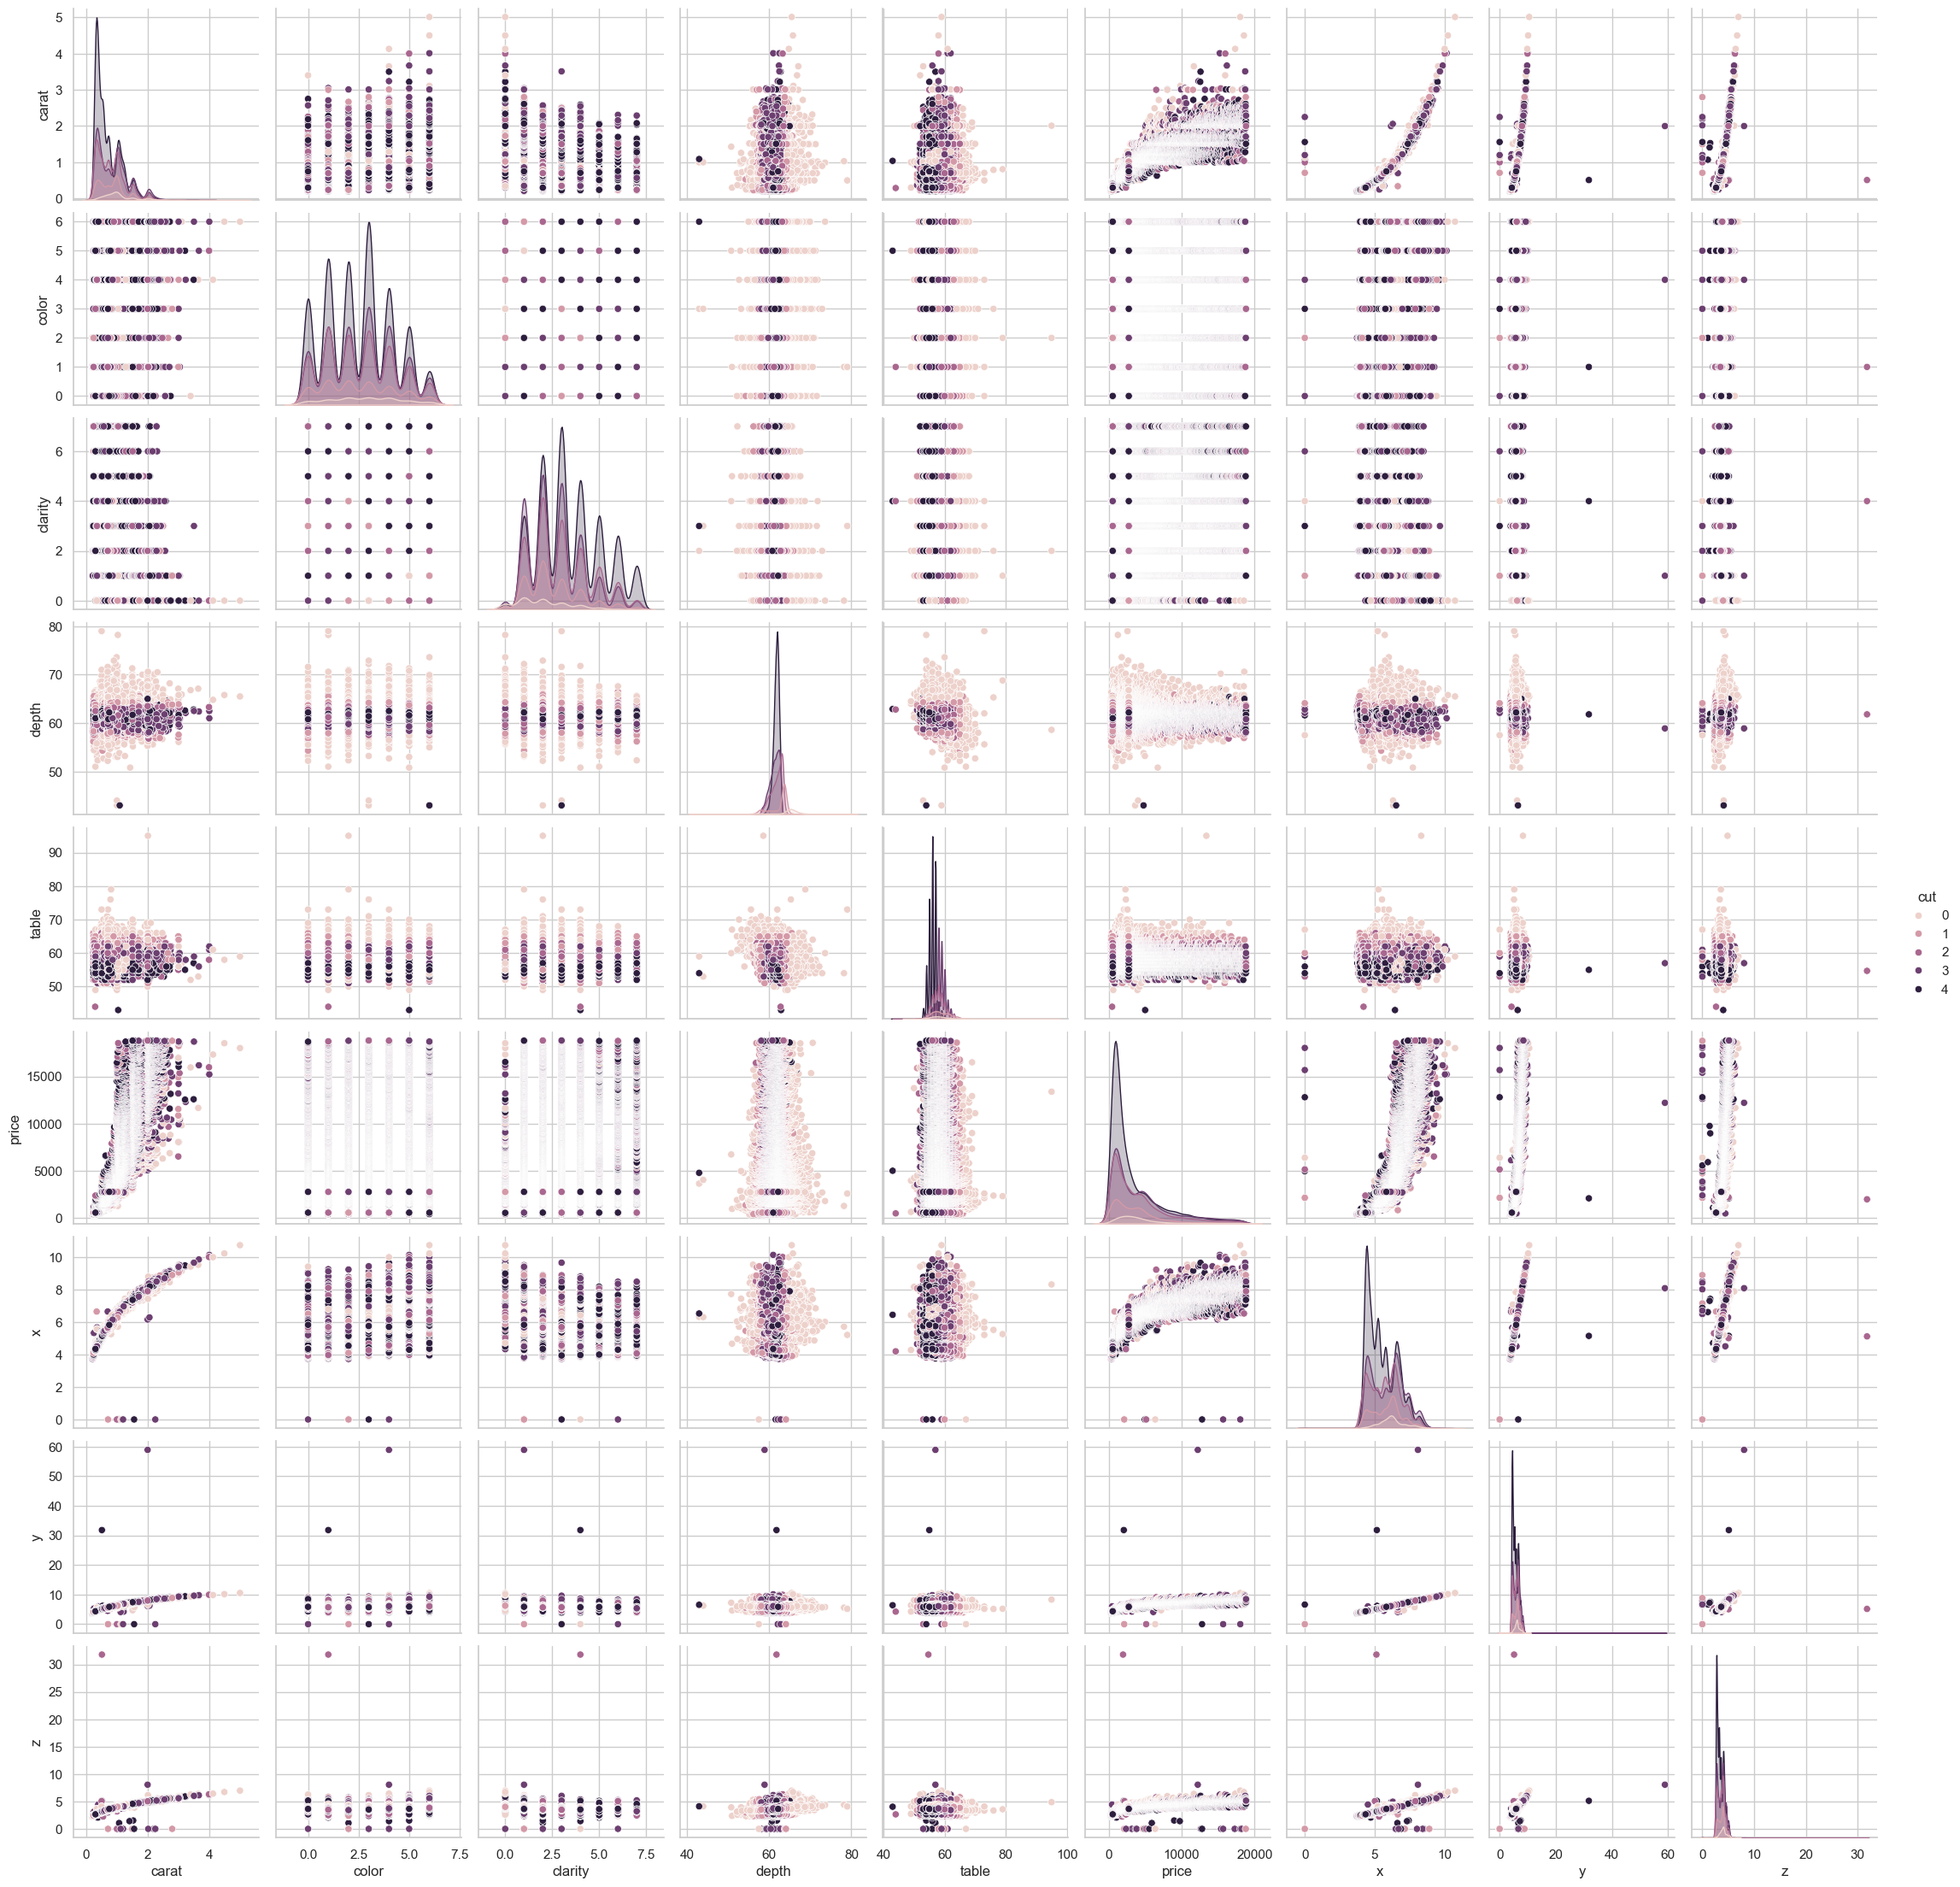

In [100]:
sn.pairplot(data = df, hue = ("cut"))